In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Spots under a Short Timescale Approximation

Exploring how spots would affect inferred stellar properties from CMDs, including effective temperatures, luminosities, and ages (notably from lithium abundances).

## Color-magnitude diagrams

First, we'll change directory to the location where isochrones (spotted and standard) are stored.

In [2]:
cd /Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts/

/Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts


In [3]:
# routine to load a compressed isochrones
def loadIsochrone(filename):
    iso = np.genfromtxt(filename)
    bools = [x[0] < 1.65 for x in iso]
    return np.compress(bools, iso, axis=0)

Let's now look at how the introduction of starspots affects the morphology of different color-magnitude diagrams (CMDs). We'll consider three different CMDs: (1) $(B-V)/M_V$, (2) $(V - I_C)/M_V$, (3) $(V - K)/M_V$, under varying assumptions about starspot parameters. Beginning with fixed temperature contrast, we adopt ($\varpi = 0.9,\ 0.7,\ 0.5$) for a constant surface coverages of 30%, 50%, and 70%, which are thought to be quite typical of active stars (e.g., O'Neal et al. 1998).

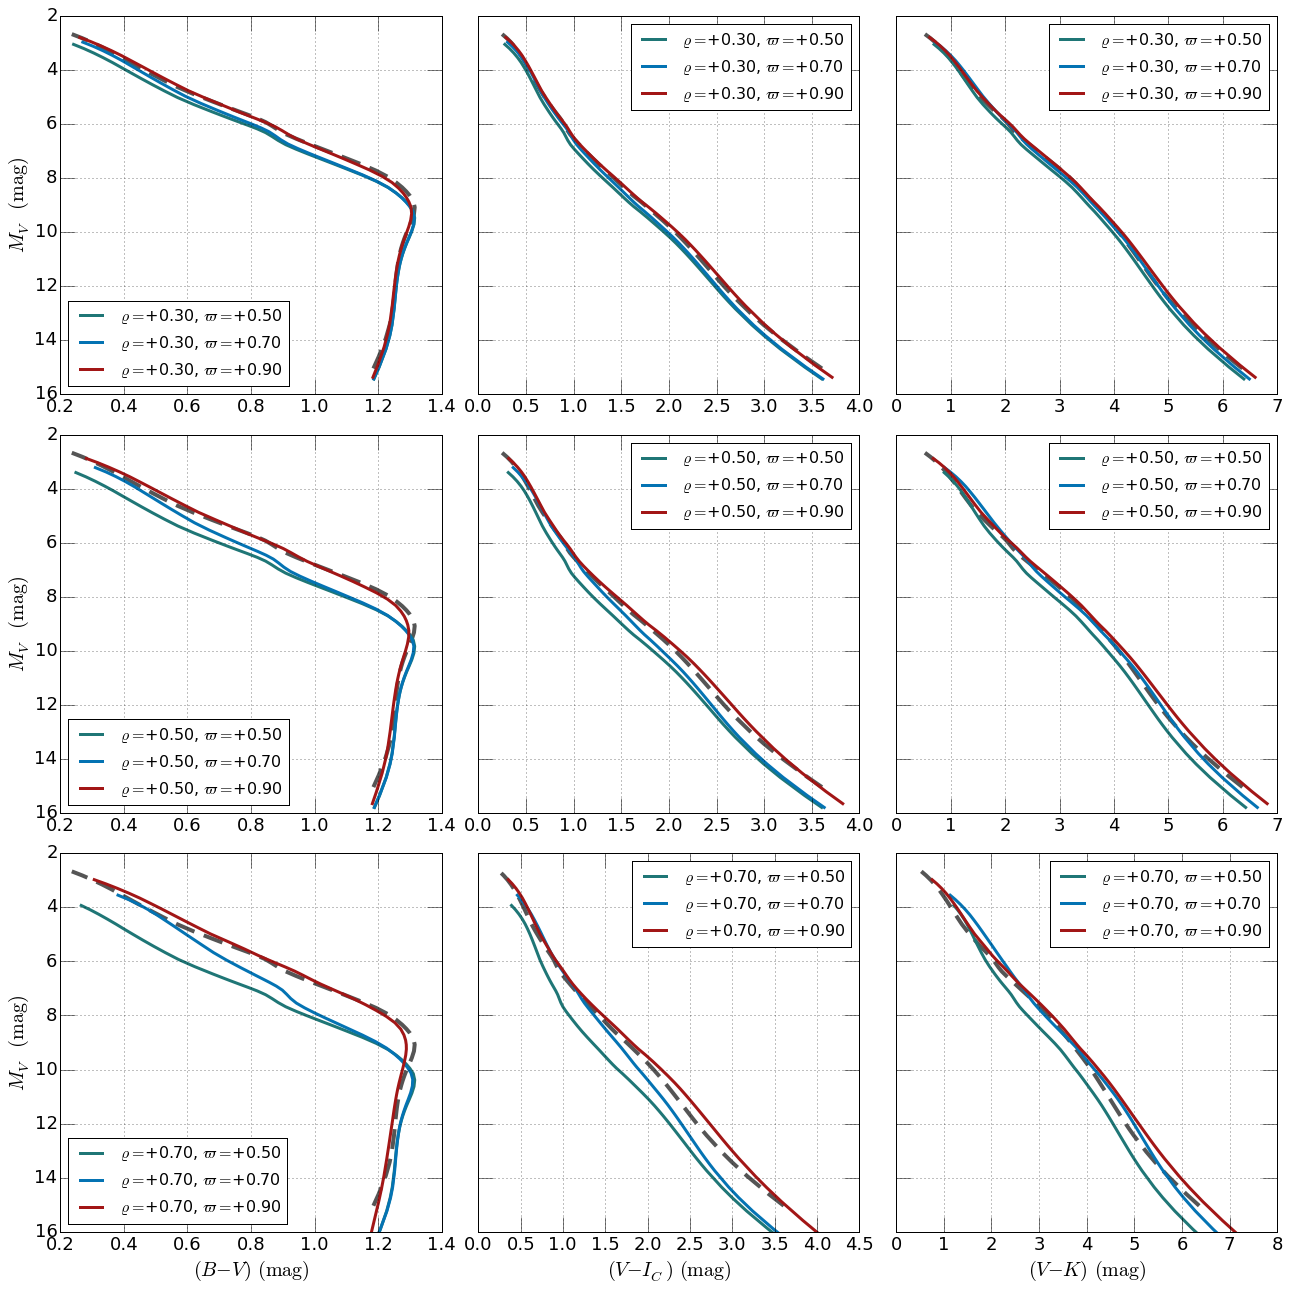

In [4]:
# simple dictionaries to help de-clutter plotting routine
labels = {0: '$(B - V)$', 1: '$(V - I_C)$', 2: '$(V - K)$'}
colors = {0: '#1F7676', 1:'#0473B3', 2: '#A21616', 3:'#555555'}
color_cols = {'U': 6, 'B': 7, 'V': 8, 'R': 9, 'I': 10,
              'J':11, 'H':12, 'K':13}
colc = {0:('B', 'V'), 1:('V', 'I'), 2:('V', 'K')}

# define spot properties
varpi  = [0.5, 0.7, 0.9]
varrho = [0.3, 0.5, 0.7]

fig, ax = plt.subplots(3, 3, figsize=(18, 18), sharey=True)

# set x-axis labels
for i in range(3):
    ax[2, i].set_xlabel(labels[i] + ' $({\\rm mag})$', fontsize=20.)

# set y-axis labels
for i in range(3):
    ax[i, 0].set_ylim(16., 2.)
    ax[i, 0].set_ylabel('$M_V$  $({\\rm mag})$', fontsize=20.)

iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')
for i in range(9):
    row = int(np.floor(i / 3.))
    col = i%3
    
    # set axis tick params
    ax[row, col].tick_params(which='major', axis='both', length=15., labelsize=18.)
    
    # plot standard isochrone
    n = colc[col]
    ax[row, col].plot(iso[:, color_cols[n[0]]] - iso[:, color_cols[n[1]]], iso[:, color_cols['V']], 
                      dashes=(20., 10.), lw=4, c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[row]*(1.0 - np.array(varpi)**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[row], varpi[j])
        line = '$\\varrho = ${:+4.2f}, $\\varpi = ${:+4.2f}'.format(varrho[row], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[row, col].plot(spot_iso[:, color_cols[n[0]]] - spot_iso[:, color_cols[n[1]]], 
                          spot_iso[:, color_cols['V']], lw=3, c=colors[j], label=line)
    if (col == 0):
        loc = 3
    else:
        loc = 1
    ax[row, col].grid(True)
    ax[row, col].legend(loc=loc, fontsize=16.)

fig.tight_layout()

There is a general decline in luminosity accompanying the introduction of short timescale spots as opposed to a reddening of broadband colors typically expected from spotted models. The argument typically advanced is that spots will cause a reddening of stellar broad-band colors as the spots are cooler and therefore redistribute flux to the red. This argument is still valid in our experiment above, however, the total flux emitted by spots is significantly reduced compared to the background photosphere. Therefore, the final spectral energy distribution will largely reflect a decresae in total flux with a marginal shift toward redder colors. 

There are issues with the MARCS transformations, primarily for ($B-V$) colors. We are still exploring whether this is due to poor performance of MARCS models in $B$, $V$, or both $B$ and $V$. We know from comparisons to empirical CMD sequences (e.g., Pleiades and Praesepe) that models appear to predict $V$-band magnitudes with moderate accuracy above $M_V \sim 8$ mag, with steadily declining accuracy at fainter magnitudes. This will introduce some errors into the colors predicted by our spotted models. However, these is expected at the 0.1 mag level, which is often well below shifts expected from spots.

One must also consider the limits of the stellar model grid, as well. The MARCS grid extends down to effective temperatures of 2600 K. Beyond that limit, the code relies on extrapolation to compute bolometric corrections. Extrapolation is shown to be accurate between 1.0 and 1.5 mag for optical colors, but this accuracy is improved to 0.04 magnitudes in the NIR, at least compared to the broadband magnitudes of stars with similar effective temperatures in the Phoenix BT-Settl grid (see note on [bolometric corrections](http://nbviewer.ipython.org/github/gfeiden/Notebook/blob/master/Projects/ngc2516_spots/bolometric_corrections.ipynb)). 

We can still show at which spot contrast (spot temperature) we should consider worrying about the boundaries of our grid. Below is a figure showing the limiting value of $\varpi_{2600}$ as a function of $M_V$ for our model grid, where $\varpi_{2600}$ is the value of $\varpi$ where $T_{\rm spot} = 2600$ K.

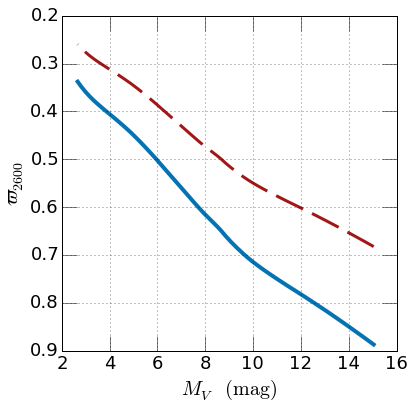

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6., 6.))

ax.tick_params(which='major', axis='both', length=15., labelsize=18.)
ax.set_xlabel('$M_V$  $({\\rm mag})$', fontsize=20.)
ax.set_ylabel('$\\varpi_{2600}$', fontsize=20.)

ax.set_xlim(2., 16.)
ax.set_ylim(0.9, 0.2)
ax.grid(True)

ax.plot(iso[:,8], 2600./10**iso[:,1], '-', lw=4, c=colors[1])
ax.plot(iso[:,8], 2000./10**iso[:,1], dashes=(30.,10.), lw=3, c=colors[2])

Note that the plotted magnitude is the magnitude of an unspotted star. From this figure we can see that all of the models have spot properties within the grid for $\varpi > 0.9$, whereas stars near $M_V \approx 10$ (M dwarfs) require extrapolation for the computation of their spot properties when $\varpi = 0.7$, which occurs in the above sequences. Finally, when $\varpi$ reaches an extreme value of $0.5$, stars fainter than $M_V = 6$ require extrapolation to properly account for their spot properties. Extrapolation is provides a reasonable estimate for the spot properties down to the limiting $\varpi$ shown by the red line. Based on this evidence, we can be reasonably confident about the properties of spots predicted by our bolometric corrections for all starspot models with $\varpi > 0.7$.

What is the luminosity fraction emitted by spots compared to the background photosphere? 

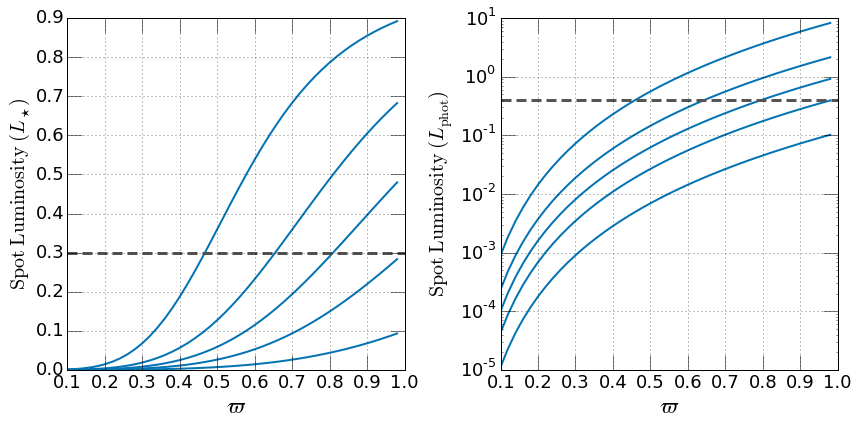

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12., 6.))

for axis in ax:
    axis.tick_params(which='major', axis='both', length=15., labelsize=18.)
    axis.set_xlabel('$\\varpi$', fontsize=22.)
    axis.grid(True)
    
ax[0].set_ylabel('${\\rm Spot\ Luminosity}\ (L_{\\star})$', fontsize=20.)
ax[1].set_ylabel('${\\rm Spot\ Luminosity}\ (L_{\\rm phot})$', fontsize=20.)

varpi   = np.arange(0.1, 1.0, 0.02)
varrhos = np.arange(0.1, 1.0, 0.20)

# fraction of total luminosity
for varrho in varrhos:
    Lspot  = varpi**4*varrho/(varrho*varpi**4 + 1.0 - varrho)
    ax[0].plot(varpi, Lspot, lw=2, c=colors[1])
ax[0].plot([0.1, 1.0], [0.3, 0.3], dashes=(10., 5.0), lw=3, c=colors[3])

# fraction compare to ambient photosphere luminosity
for varrho in varrhos:
    Lspot  = varpi**4*varrho/(1.0 - varrho)
    ax[1].semilogy(varpi, Lspot, lw=2, c=colors[1])
ax[1].semilogy([0.1, 1.0], [0.4, 0.4], dashes=(10., 5.0), lw=3, c=colors[3])
    
fig.tight_layout()

From the CMDs, we demonstrate that spots redden the emergent spectral energy distribution for particular combinations of spot areal coverages, $\varrho$, and temperature contrasts, $\varpi$, up to a point. However, as the spot temperature contrast is decreased at fixed surface areal coverage, spectral energy distributions move back toward the blue and the primary influence spots have on stellar properties is to generally decrease the bolometric luminosity. There is still a net reddening on the SEDs, but the amount of reddening expected from the presence of spots is not a monotically increasing function of spot temperature contrast. 

This can be quite simply explained. Beginning with spots slightly cooler than the photosphere, the flux is still relatively high compared to the ambient photosphere. Here, surface coverage is important for controlling precisely how much reddening of the SED occurs. For a given spot coverage, however, there is still a net reddening caused by the cooler spots, which increases as spots become cooler. However, for a fixed spot coverage, as one continues to reduce the spot temperature contrast, the spot luminosity also decreases. Eventually, although there is a net reddening of the SED, the amount of flux contributed to the bolometric luminosity by the spots is negligible compared to the amount of flux from the ambient photosphere. Thus, as the spots become darker, they progress toward a blackening, causing only a net drop in luminosity and not a shift of the flux distribution. 

We find that as surface areal coverage is increased, the critical value of $\varpi$ at which point SEDs shift blueward decreases. Estimating the combinations of $\varrho$ and $\varpi$ from the CMDs, we find from the two above figures that the combinations large correspond to combinations for which spots contribute about 30% to the total bolometric luminosity and are about 40% as luminous as the ambient photosphere. Critical values are indicated by the intersection of curves representing spot families (blue solid lines) and the horizontal threshold (grey dashed line).

Now, NIR color-magnitude diagrams.

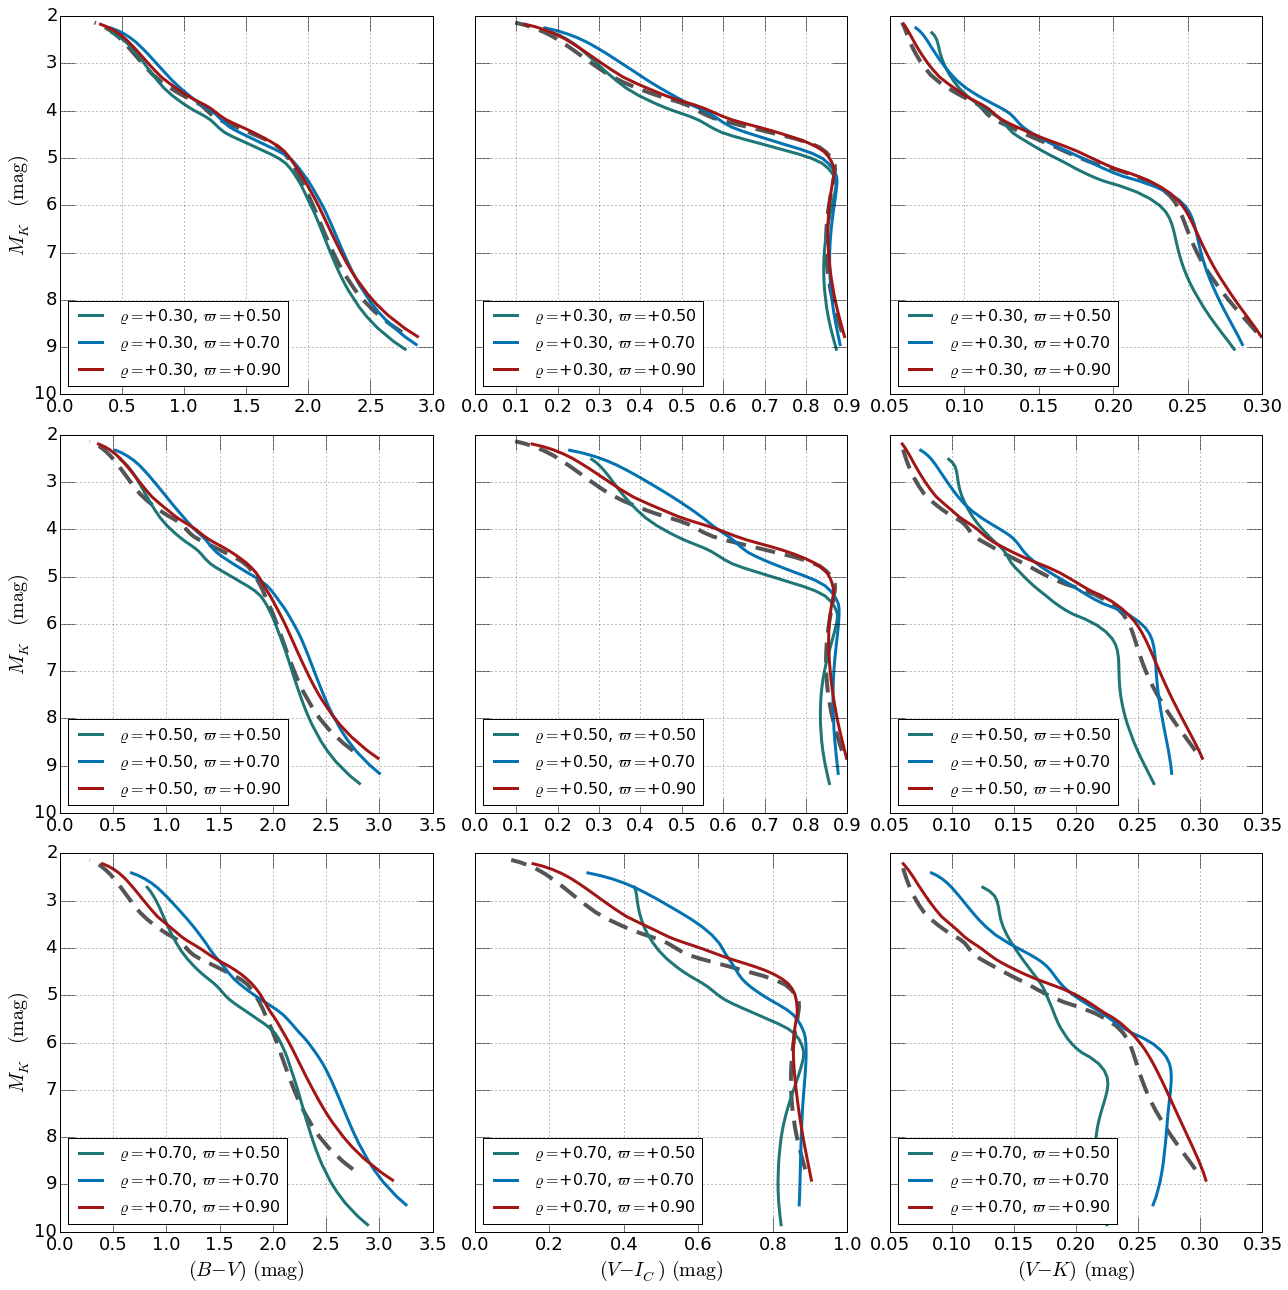

In [7]:
# simple dictionaries to help de-clutter plotting routine
colc = {0:('I', 'K'), 1:('J', 'K'), 2:('H', 'K')}

# define spot properties
varpi  = [0.5, 0.7, 0.9]
varrho = [0.3, 0.5, 0.7]

fig, ax = plt.subplots(3, 3, figsize=(18, 18), sharey=True)

# set x-axis labels
for i in range(3):
    ax[2, i].set_xlabel(labels[i] + ' $({\\rm mag})$', fontsize=20.)

# set y-axis labels
for i in range(3):
    ax[i, 0].set_ylim(10., 2.)
    ax[i, 0].set_ylabel('$M_K$  $({\\rm mag})$', fontsize=20.)

iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')
for i in range(9):
    row = int(np.floor(i / 3.))
    col = i%3
    
    # set axis tick params
    ax[row, col].tick_params(which='major', axis='both', length=15., labelsize=18.)
    
    # plot standard isochrone
    n = colc[col]
    ax[row, col].plot(iso[:, color_cols[n[0]]] - iso[:, color_cols[n[1]]], iso[:, color_cols['K']], 
                      dashes=(20., 10.), lw=4, c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[row]*(1.0 - np.array(varpi)**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[row], varpi[j])
        line = '$\\varrho = ${:+4.2f}, $\\varpi = ${:+4.2f}'.format(varrho[row], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[row, col].plot(spot_iso[:, color_cols[n[0]]] - spot_iso[:, color_cols[n[1]]], 
                          spot_iso[:, color_cols['K']], lw=3, c=colors[j], label=line)
    if (col == 0):
        loc = 3
    else:
        loc = 3
    ax[row, col].grid(True)
    ax[row, col].legend(loc=loc, fontsize=16.)

fig.tight_layout()

Now instead of illustrating variation introduced by temperature contrast, we'll fixed temperature constrast in each frame and adjust the surface areal coverage.

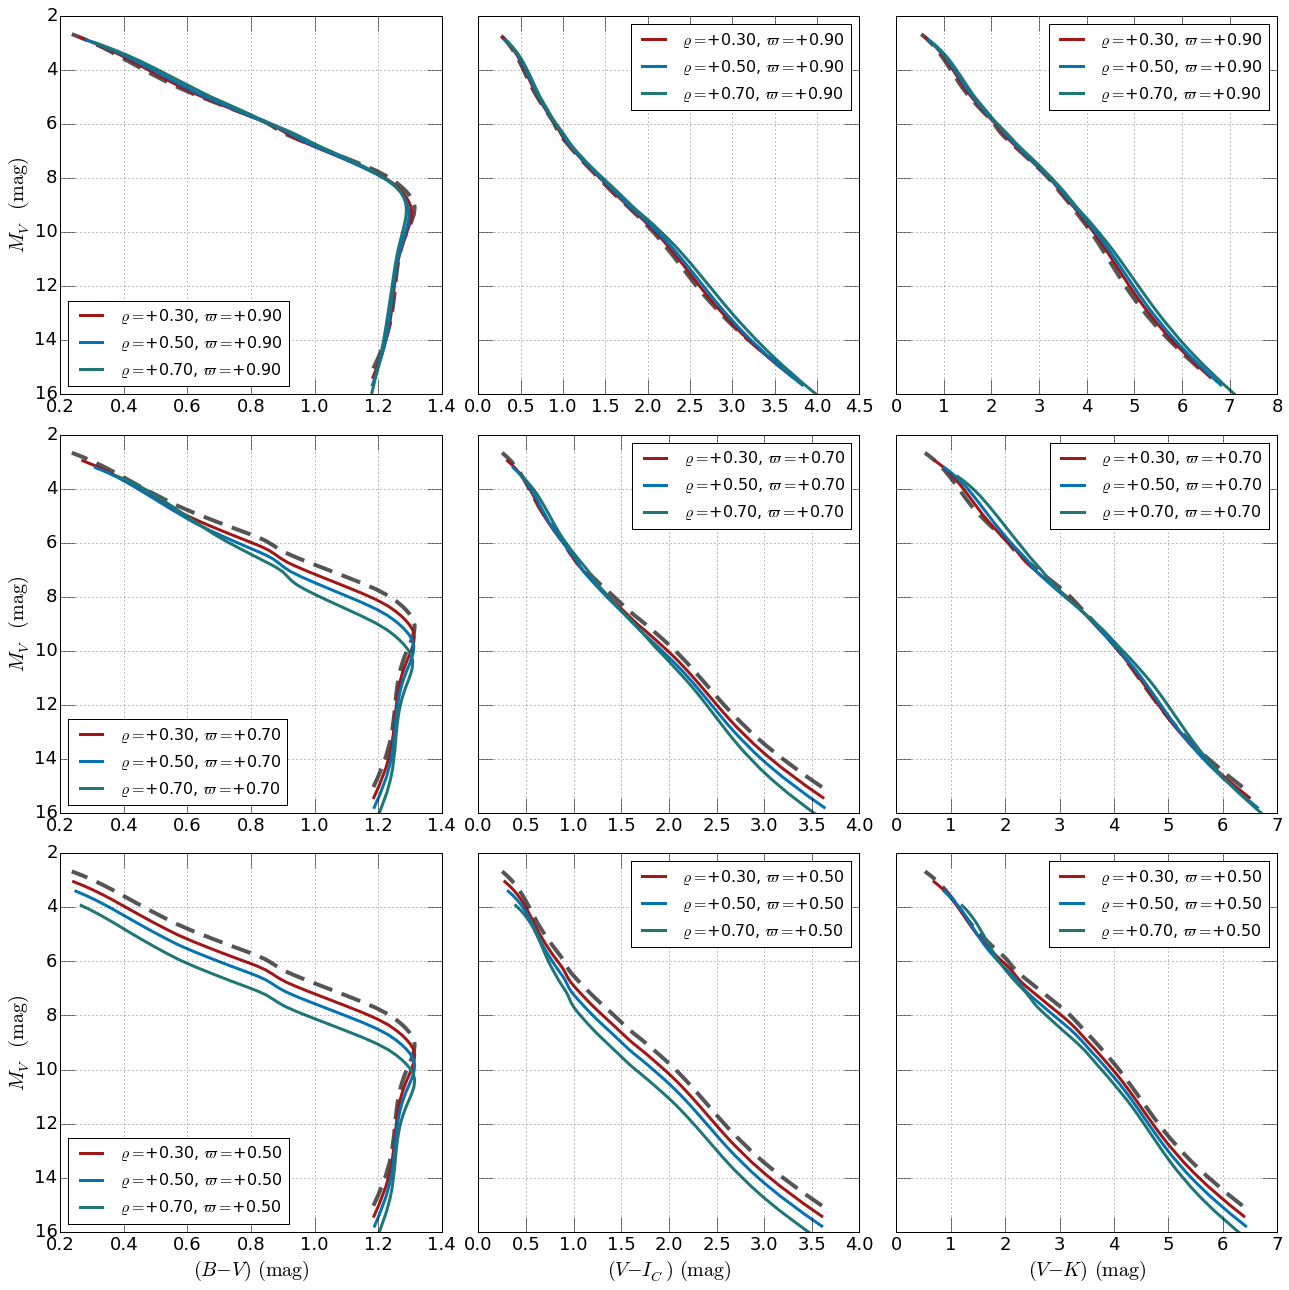

In [8]:
# simple dictionaries to help de-clutter plotting routine
labels = {0: '$(B - V)$', 1: '$(V - I_C)$', 2: '$(V - K)$'}
colors = {0: '#1F7676', 1:'#0473B3', 2: '#A21616', 3:'#555555'}
color_cols = {'U': 6, 'B': 7, 'V': 8, 'R': 9, 'I': 10,
              'J':11, 'H':12, 'K':13}
colc = {0:('B', 'V'), 1:('V', 'I'), 2:('V', 'K')}

# define spot properties
varpi  = [0.5, 0.7, 0.9]
varrho = [0.3, 0.5, 0.7]

fig, ax = plt.subplots(3, 3, figsize=(18, 18), sharey=True)

# set x-axis labels
for i in range(3):
    ax[2, i].set_xlabel(labels[i] + ' $({\\rm mag})$', fontsize=20.)

# set y-axis labels
for i in range(3):
    ax[i, 0].set_ylim(16., 2.)
    ax[i, 0].set_ylabel('$M_V$  $({\\rm mag})$', fontsize=20.)

iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')
for i in range(9):
    row = int(np.floor(i / 3.))
    col = i%3
    
    # set axis tick params
    ax[row, col].tick_params(which='major', axis='both', length=15., labelsize=18.)
    
    # plot standard isochrone
    n = colc[col]
    ax[row, col].plot(iso[:, color_cols[n[0]]] - iso[:, color_cols[n[1]]], iso[:, color_cols['V']], 
                      dashes=(20., 10.), lw=4, c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - np.array(varrho)*(1.0 - varpi[2-row]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-row])
        line = '$\\varrho = ${:+4.2f}, $\\varpi = ${:+4.2f}'.format(varrho[j], varpi[2-row])
        spot_iso = loadIsochrone(filename)
        ax[row, col].plot(spot_iso[:, color_cols[n[0]]] - spot_iso[:, color_cols[n[1]]], 
                          spot_iso[:, color_cols['V']], lw=3, c=colors[2-j], label=line)
    if (col == 0):
        loc = 3
    else:
        loc = 1
    ax[row, col].grid(True)
    ax[row, col].legend(loc=loc, fontsize=16.)

fig.tight_layout()

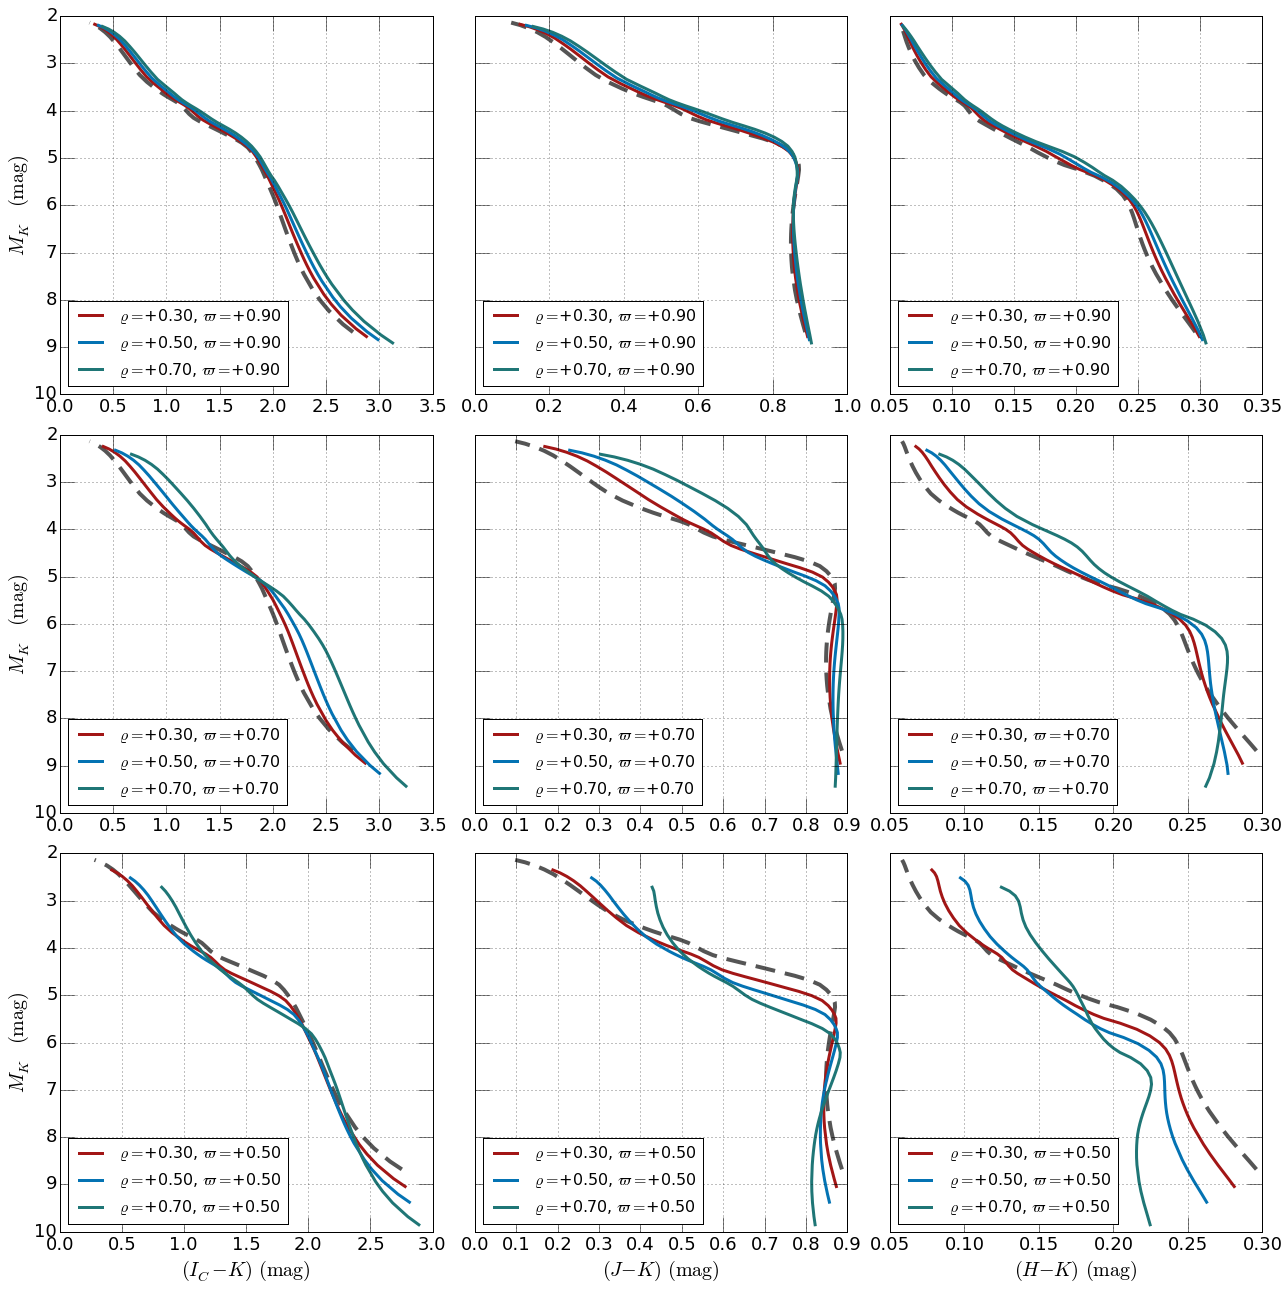

In [9]:
# simple dictionaries to help de-clutter plotting routine
labels = {0: '$(I_C - K)$', 1: '$(J - K)$', 2: '$(H - K)$'}
colc = {0:('I', 'K'), 1:('J', 'K'), 2:('H', 'K')}

# define spot properties
varpi  = [0.5, 0.7, 0.9]
varrho = [0.3, 0.5, 0.7]

fig, ax = plt.subplots(3, 3, figsize=(18, 18), sharey=True)

# set x-axis labels
for i in range(3):
    ax[2, i].set_xlabel(labels[i] + ' $({\\rm mag})$', fontsize=20.)

# set y-axis labels
for i in range(3):
    ax[i, 0].set_ylim(10., 2.)
    ax[i, 0].set_ylabel('$M_K$  $({\\rm mag})$', fontsize=20.)

iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')
for i in range(9):
    row = int(np.floor(i / 3.))
    col = i%3
    
    # set axis tick params
    ax[row, col].tick_params(which='major', axis='both', length=15., labelsize=18.)
    
    # plot standard isochrone
    n = colc[col]
    ax[row, col].plot(iso[:, color_cols[n[0]]] - iso[:, color_cols[n[1]]], iso[:, color_cols['K']], 
                      dashes=(20., 10.), lw=4, c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - np.array(varrho)*(1.0 - varpi[2-row]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-row])
        line = '$\\varrho = ${:+4.2f}, $\\varpi = ${:+4.2f}'.format(varrho[j], varpi[2-row])
        spot_iso = loadIsochrone(filename)
        ax[row, col].plot(spot_iso[:, color_cols[n[0]]] - spot_iso[:, color_cols[n[1]]], 
                          spot_iso[:, color_cols['K']], lw=3, c=colors[2-j], label=line)
    if (col == 0):
        loc = 3
    else:
        loc = 3
    ax[row, col].grid(True)
    ax[row, col].legend(loc=loc, fontsize=16.)

fig.tight_layout()

Figure comparable with Spruit & Weiss (1986) Figure 5. They specifically looked at the effect of long-term spot coverage on colors and magnitudes.

In [10]:
varrho = 0.2
varpi  = 0.84
zeta   = 1.0 - varrho*(1.0 - varpi**4)

filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta, varrho, varpi)
spot_iso = loadIsochrone(filename)

SW86_V = np.array([[0.1, 0.1], [0.5, 0.13], [1.0, 0.17], [1.5, 0.2]])
SW86_K = np.array([[0.1, 0.05], [1.5, 0.08]])

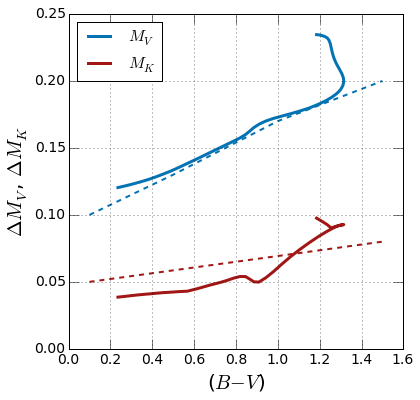

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6., 6.))

ax.set_xlabel('($B-V$)', fontsize=20.)
ax.set_ylabel('$\\Delta M_V$, $\\Delta M_K$', fontsize=20.)
ax.tick_params(which='major', axis='both', length=10., labelsize=14.)

ax.plot(iso[:, color_cols['B']] - iso[:, color_cols['V']], 
        spot_iso[:, color_cols['V']] - iso[:, color_cols['V']], 
        lw=3, c=colors[1], label="$M_V$")
ax.plot(SW86_V[:,0], SW86_V[:,1], lw=2, dashes=(5., 5.), c=colors[1])

ax.plot(iso[:, color_cols['B']] - iso[:, color_cols['V']], 
        spot_iso[:, color_cols['K']] - iso[:, color_cols['K']], 
        lw=3, c=colors[2], label="$M_K$")
ax.plot(SW86_K[:,0], SW86_K[:,1], lw=2, dashes=(5., 5.), c=colors[2])

ax.legend(loc=2, fontsize=16.)
ax.grid(True)

In general, our model predictions for reduction in $V$ band magnitudes compare well to those from Spruit & Weiss (1986). The slope of the relation is quite well reproduced, with the exception of the erroneous M dwarf knee. Our model deviate from predictions of Spruit & Weiss (1986) in $K$-band are largely due to our adoption of non-grey model atmospheres instead of a simple blackbody spectral energy distribution. 